In [53]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt

In [61]:
im = Image.open('../datasets/train/animal/im_000021.png')



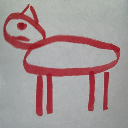

In [62]:
im

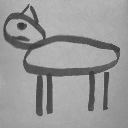

In [63]:
bw = im.convert('L')
bw

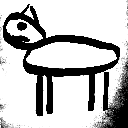

In [64]:
enhancer = ImageEnhance.Contrast(bw)
contrasted = enhancer.enhance(30)
contrasted


In [72]:
N = 115

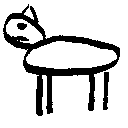

In [73]:
ar = np.array(bw)
filtered_ar = ar >= N
Image.fromarray(filtered_ar)

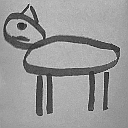

In [66]:
sharper = bw.filter(ImageFilter.SHARPEN)
sharper

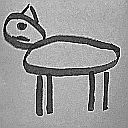

In [67]:
enhanced_edges = bw.filter(ImageFilter.EDGE_ENHANCE)
enhanced_edges

In [68]:
np.array(bw).mean()

153.00262451171875

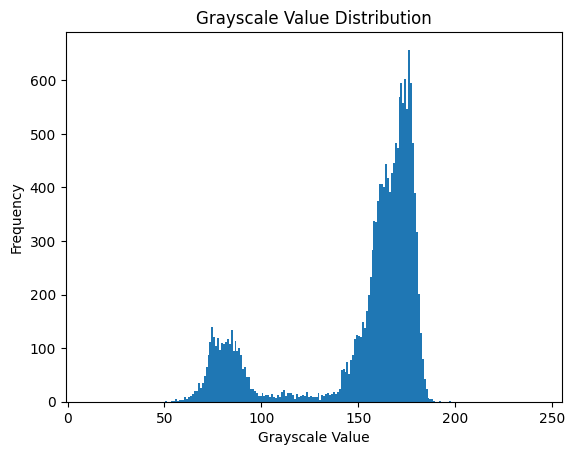

In [69]:
hist, bins = np.histogram(np.array(bw), bins=257, range=(-1, 255))

# Plot the histogram
plt.bar(bins[:-1], hist, width=1)
plt.xlim(min(bins), max(bins))
plt.title('Grayscale Value Distribution')
plt.xlabel('Grayscale Value')
plt.ylabel('Frequency')
plt.show()

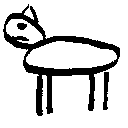

In [70]:
thresholded = bw.point(lambda x: 255 if x > 110 else 0)
thresholded

In [71]:
hist

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,   0,   0,   1,   1,   5,   2,   4,   3,   4,   8,   5,   8,
        11,  15,  20,  20,  35,  25,  35,  48,  65,  87, 111, 140, 120,
       104, 119,  96, 109, 107, 111, 117, 107, 133,  95, 114,  95, 101,
        87,  61,  64,  46,  46,  23,  24,  20,  16,  10,  11,  16,  11,
        12,  13,   8,  15,   9,   7,  12,   9,  18,  22,  11,  17,  16,
        17,  12,   6,  15,   9,  10,  13,  11,  18,   9,  11,   9,   8,
         9,  16,   3,  12,  10,  14,  16,  13,  14,  19,  15,  19,  24,
        59,  61,  56,  74,  51,  77,  87, 118, 124, 123, 121, 148, 138,
       170, 199, 232, 283, 337, 335, 375, 406, 406, 400, 444, 418, 391,
       426, 445, 482, 473, 569, 595, 557, 603, 546, 657, 595, 48

In [74]:
hist2, bins2 = np.histogram(np.array(bw), bins=25, range=(-1, 255))

In [78]:
hist2

array([   0,    0,    0,    0,    0,   21,  182,  999, 1128,  276,  114,
        135,  119,  203,  892, 2623, 5049, 4476,  166,    1,    0,    0,
          0,    0,    0])

In [79]:
np.median(bw)

166.0